# Data Mining with Python tutorial

This tutorial shows some basic Data Mining tasks with Python.

Please make sure to install all required packages first:
> Note: Kneed is a package used identifying knee point in given x and y set of values. This package is not preinstalled library in collab like Numpy, Pandas so we need to install it.

In [ ]:
!pip install kneed

## Classification

In this section, we use train a Decision Tree to predict whether an animal is a mammal or not.

First, we need to import some packages. pandas is the Python data analysis library, matplotlib and seaborn are used to create graphics.

Refer to https://pandas.pydata.org/docs/reference/index.html#api for a full documentation of pandas, and to https://seaborn.pydata.org/ for tutorials and documentation about data visualisation with Python.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Now that the necessary libraries are available, we can load the data from the *vertebrate.csv* file.


In [ ]:
ls

'Clustered customers.csv'   Mall_Customers.csv  'Online Retail.xlsx'   vertebrate.csv


In [ ]:
# Read data and store in the df variable
df=pd.read_csv("vertebrate.csv")
# Show first 5 rows of data set
df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


The method *info()* prints a concise summary of the data frame.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              15 non-null     object
 1   Warm-blooded      15 non-null     int64 
 2   Gives Birth       15 non-null     int64 
 3   Aquatic Creature  15 non-null     int64 
 4   Aerial Creature   15 non-null     int64 
 5   Has Legs          15 non-null     int64 
 6   Hibernates        15 non-null     int64 
 7   Class             15 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.1+ KB


The method *describe()* prints descriptive statistics.

In [ ]:
df.describe()

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,0.400000,0.533333,0.133333,0.666667,0.333333
std,0.516398,0.507093,0.516398,0.351866,0.487950,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's check if the data has any missing values.

In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Name,0
Warm-blooded,0
Gives Birth,0
Aquatic Creature,0
Aerial Creature,0
Has Legs,0
Hibernates,0
Class,0


Great, there are no missing values. Let's check if our data set is balanced.

In [ ]:
class_counts = df['Class'].value_counts()
max_class_size = class_counts.max()
balanced_data = pd.DataFrame()

<Axes: xlabel='Class', ylabel='count'>

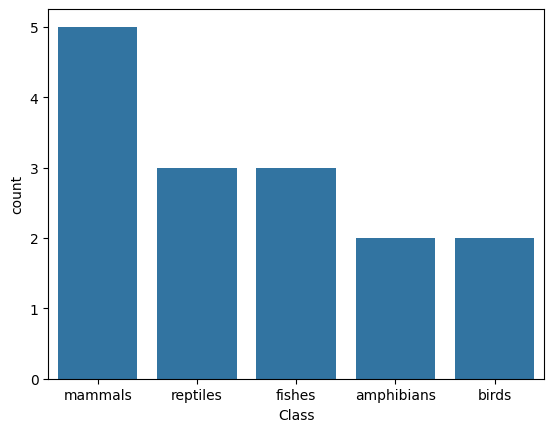

In [ ]:
sns.countplot(data = df, x = "Class")

That's reasonably balanced. We can now go on and create our model.

As a first step, we need to split our data set into predictors (X) and target (y) columns.

In [ ]:
# drop Name and Class
X = df.drop(columns = ['Name', 'Class'])
X.head()

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1


In [ ]:
# save the target variable in y
y = df['Class']
# value_counts counts the unique values
y.value_counts()

,count
Class,
mammals,5
reptiles,3
fishes,3
amphibians,2
birds,2


Now we need to split the data into a training and a test data set. We use the *train_test_split()* function for this.

In [ ]:
from sklearn.model_selection import train_test_split
# Split X and y into training and testing data set, which testing set containing 40% of values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

Next, we train (fit) the decision tree and use it to predict our test data set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import classifier
model=DecisionTreeClassifier() # initialise
model.fit(X_train,y_train) # train
y_predict = model.predict(X_test)
y_predict

array(['amphibians', 'amphibians', 'mammals', 'fishes', 'birds', 'fishes'],
      dtype=object)

Let's compare our predictions with the actual values.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
cm

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0]])

Visualise it as a confusion matrix.

In [ ]:
print(cm.shape)
print(len(model.classes_))


(5, 5)
5


If model.classes_ contains classes not present in the test predictions, you may need to adjust the generation of the confusion matrix to include all expected classes:



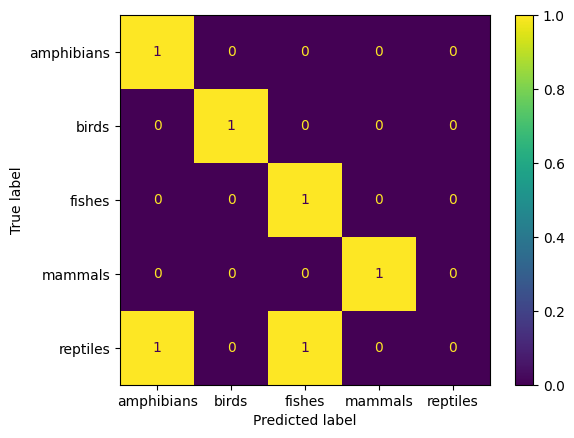

In [ ]:


#display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


accuracy = np.diag(cm).sum() / cm.sum()
error_rate = 1 - accuracy
precision = precision_score(y_test, y_predict, average=None)  # Returns an array for each class
recall = recall_score(y_test, y_predict, average=None)        # Returns an array for each class

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.8333333333333334
Error Rate: 0.16666666666666663
Precision: [1.  1.  0.5 1.  0. ]
Recall: [1. 1. 1. 1. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finally, lets show the decision tree.

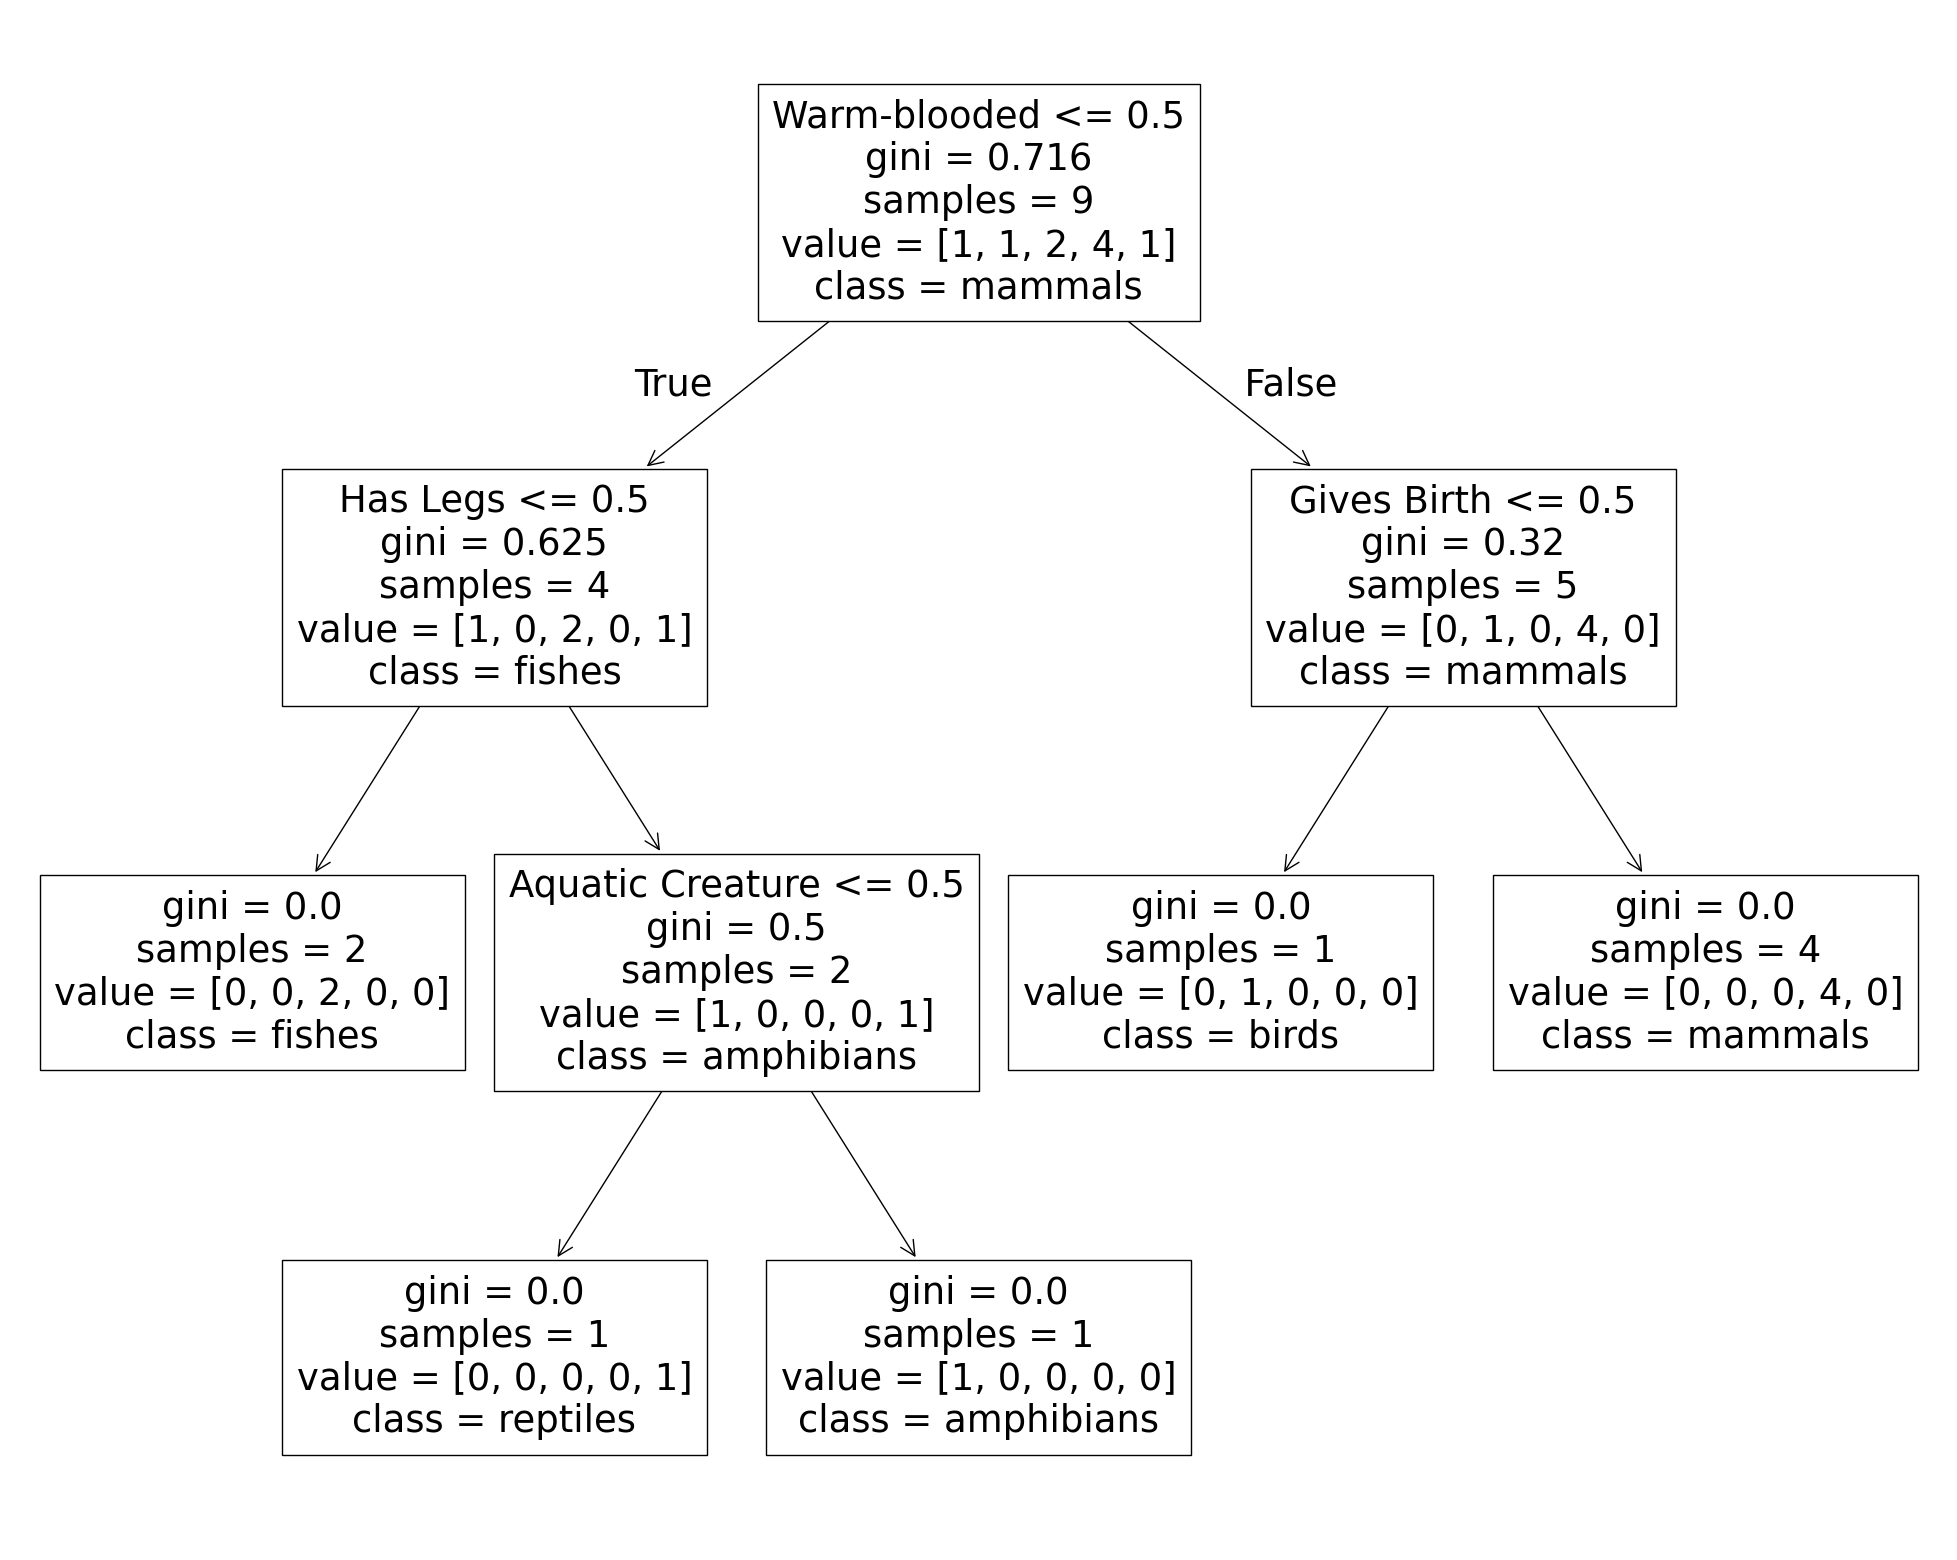

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X.columns,
                   class_names=model.classes_,
                   filled=False)

In [ ]:
if cm.shape[0] != len(model.classes_):
    display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_[:cm.shape[0]])
else:
    display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)

## Cluster analysis

In this section, we will perfom a cluster analysis on a data set of customers of a shopping mall.

We start by reading the data.

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We don't want to use the CustomerID for the clustering. We also need to replace *Genre* with a numberic value. Finally, we use the StandardScaler to make sure all variables are similarly scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = 'CustomerID')
X['Genre'] = X['Genre'].replace({'Male': 0, 'Female': 1})


# Selecting relevant features for clustering
features = X[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
X = pd.DataFrame(scaled_features, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Displaying the first few rows of the scaled features DataFrame
X.head()


<ipython-input-71-10f87d59b97f>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Genre'] = X['Genre'].replace({'Male': 0, 'Female': 1})


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Now we want to import KMeans and find the optimal number of clusters using the Elbow method.

<Axes: >

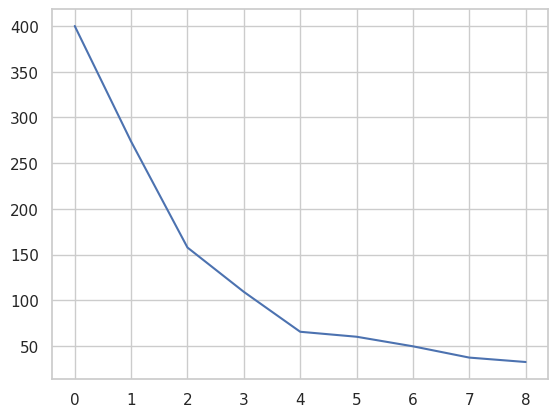

In [ ]:
from sklearn.cluster import KMeans
sse = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot is as a line plot
sns.lineplot(data = sse)

While there is not a clear elbow here, we can see the SSE is not decreasing much more after 4 clusters.

We can use *KneeLocator* to mathematically locate the knee.

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 10), sse, curve="convex", direction="decreasing"
)

kl.elbow


4

Now let's have a look at the cluster centres...

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

That's not very useful, because the centres are shown as the scaled values. We need to reverse the scaling to see the true values.

In [ ]:
centres = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns = X.columns)
centres

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


We know the centres of the cluster and can make sense of them.

We can also add the cluster number to each of the original customers.

In [ ]:
df['Cluster'] = kmeans.predict(X)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


We can now save the data frame and visualise the results in Power BI.

In [ ]:
df.to_csv('Clustered customers.csv')

Or we can visualize using Python as well

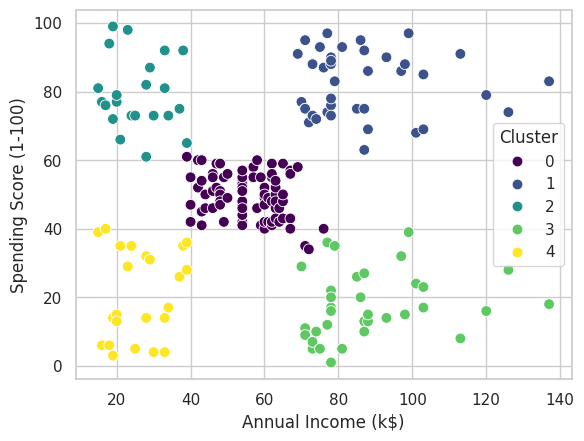

In [ ]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="viridis", s=60)
plt.show()

## Market Basket Analysis

Here, we're using association rules to create a market basket analysis.

First, we're loading the data from an Excel file.

In [ ]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


There is a little cleanup, we need to do. First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have invoice numbers and remove the credit transactions (those with invoice numbers containing C).

In [ ]:
df['Description'] = df['Description'].str.strip() #removing leading and trailing whitespace from each string in this column
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #drop records where InvoiceNo is missing
df['InvoiceNo'] = df['InvoiceNo'].astype('str') #converts the InvoiceNo column to strings.
df = df[~df['InvoiceNo'].str.contains('C')] #Filters out rows where the InvoiceNo contains the letter 'C'
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, I’m only looking at sales for France.

In [ ]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0.

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-97-25696de2cc98>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we're doing the actual work. We start by importing the functions we need.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now that the data is structured properly, we use the apriori algorithm to find frequent item sets in the one-hot encoded DataFrame. We set a minimum support threshold of 10% to capture item sets that appear together in at least 10% of all transactions.

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


From the frequent item sets, we generate association rules based on the 'lift' metric, setting a minimum threshold of 1. This helps to find item pairs that are more likely to be bought together than would be expected if they were statistically independent.

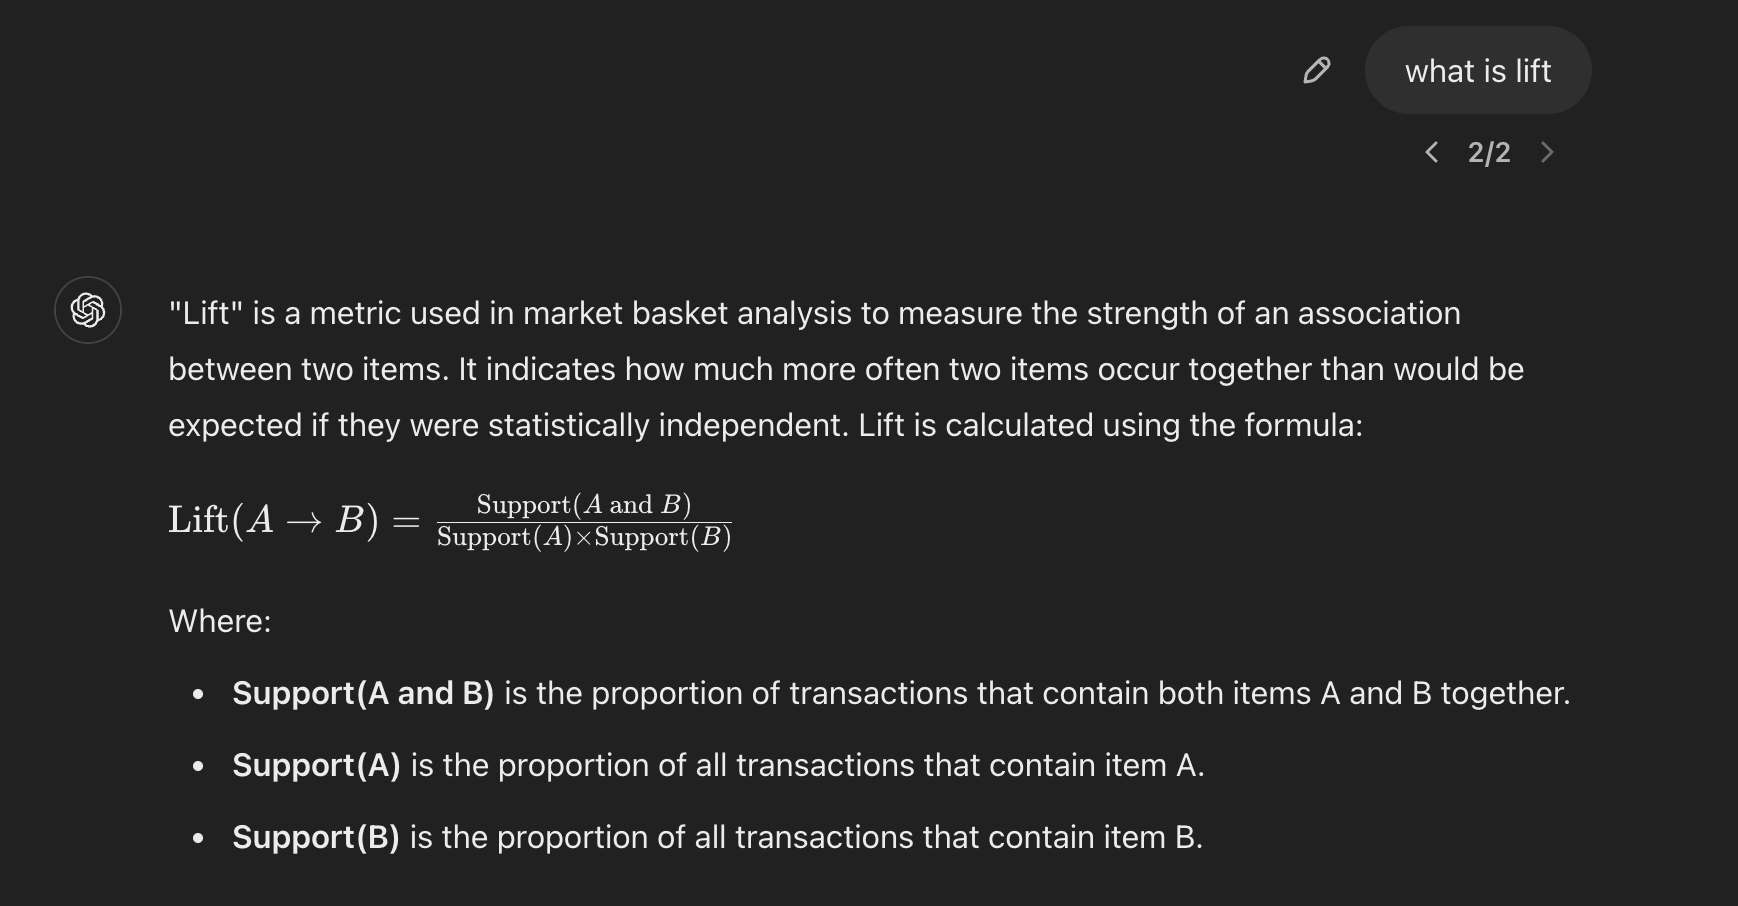

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.168367,0.170918,0.102041,0.606061,3.545907,0.073264,2.104592,0.863344
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.170918,0.168367,0.102041,0.597015,3.545907,0.073264,2.063681,0.866000
2,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.137755,0.170918,0.104592,0.759259,4.442233,0.081047,3.443878,0.898687
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.170918,0.137755,0.104592,0.611940,4.442233,0.081047,2.221939,0.934634
4,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.137755,0.102041,0.769231,5.584046,0.083767,3.736395,0.946471


That’s all there is to it! Build the frequent items using apriori then build the rules with association_rules .

Now, the tricky part is figuring out what this tells us. For instance, we can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product combinations. We can also see several where the confidence is high as well. This part of the analysis is where the domain knowledge will come in handy. Since I do not have that, I’ll just look for a couple of illustrative examples.

We can filter the dataframe using standard pandas code. In this case, look for a large lift (6) and high confidence (.8):

In [ ]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343


In [ ]:
df=pd.read_csv("Dataset2_Mushrooms.csv")
df.head()

,poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,habitat_s,habitat_v,habitat_y,Unnamed: 22_d,Unnamed: 22_g,Unnamed: 22_l,Unnamed: 22_m,Unnamed: 22_p,Unnamed: 22_u,Unnamed: 22_w
0,poisonous,0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,edible,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,edible,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,poisonous,0,0,1,0,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,edible,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isna().sum()

,0
poisonous,0
cap-shape_bell,0
cap-shape_conical,0
cap-shape_convex,0
cap-shape_flat,0
...,...
Unnamed: 22_l,1
Unnamed: 22_m,1
Unnamed: 22_p,1
Unnamed: 22_u,1
